In [24]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer#necessary, although not directly used!
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_2.csv", index_col=0)


Encode categorical values

In [25]:
one_hot_df = pd.get_dummies(base_df, prefix='industry')
one_hot_df

,revenues,ebit,employees,market_cap,outstanding_shares,stock_price,industry_automobiles,industry_finance,industry_technology
0,9.894661e+10,3.368791e+10,39161.284575,8.610166e+11,8.920990e+09,98.094205,False,False,True
1,8.989423e+10,5.421196e+10,NaN,1.169811e+12,1.817962e+10,64.925081,False,False,True
2,8.783573e+10,4.223690e+10,86764.936060,7.737738e+11,6.672160e+09,120.558326,False,False,True
3,7.903555e+10,2.921541e+10,157253.941191,6.624233e+11,4.560541e+09,148.060378,False,False,True
4,7.531216e+10,3.333325e+10,85562.800295,6.352531e+11,1.253771e+10,50.603175,False,False,True
...,...,...,...,...,...,...,...,...,...
745,4.367233e+10,2.770794e+10,25275.189008,5.527104e+11,2.663421e+10,21.238552,True,False,False
746,5.439364e+10,3.002825e+10,126636.471476,2.344987e+11,1.828919e+09,127.065020,True,False,False
747,5.089252e+10,3.439496e+10,160595.850319,8.319590e+11,1.913342e+10,44.512984,True,False,False
748,4.411272e+10,2.596733e+10,16250.395261,2.355543e+11,2.298825e+09,102.313825,True,False,False


We can see that only the feature "employees" contains missing values.

In [26]:
print(one_hot_df.isnull().sum())

revenues                 0
ebit                     0
employees               54
market_cap               0
outstanding_shares       0
stock_price              0
industry_automobiles     0
industry_finance         0
industry_technology      0
dtype: int64


We are using the IterativeImputer, which uses the data in all features of the dataset in order to impute the missing values. This method takes the other features as inputs and the missing feature column as output, and builds a regressor in order to predict the missing values. This is great, because the correlations between the features are used in order to make the predictions.


In [27]:
imputer=IterativeImputer(max_iter=20, random_state=SEED)
imputer_train=imputer.fit_transform(one_hot_df)
df_imputed=pd.DataFrame(imputer_train, columns=one_hot_df.columns)
print(df_imputed)



         revenues          ebit      employees    market_cap  \
0    9.894661e+10  3.368791e+10   39161.284575  8.610166e+11   
1    8.989423e+10  5.421196e+10   36333.011904  1.169811e+12   
2    8.783573e+10  4.223690e+10   86764.936060  7.737738e+11   
3    7.903555e+10  2.921541e+10  157253.941191  6.624233e+11   
4    7.531216e+10  3.333325e+10   85562.800295  6.352531e+11   
..            ...           ...            ...           ...   
745  4.367233e+10  2.770794e+10   25275.189008  5.527104e+11   
746  5.439364e+10  3.002825e+10  126636.471476  2.344987e+11   
747  5.089252e+10  3.439496e+10  160595.850319  8.319590e+11   
748  4.411272e+10  2.596733e+10   16250.395261  2.355543e+11   
749  4.319270e+10  2.467498e+10   23151.681403  4.903870e+11   

     outstanding_shares  stock_price  industry_automobiles  industry_finance  \
0          8.920990e+09    98.094205                   0.0               0.0   
1          1.817962e+10    64.925081                   0.0             

Here, we also do a imputation with the SimpleImputer and the median, and compare the results to those of the IterativeImputer.

In [28]:


simple_imputer=SimpleImputer(strategy='mean')
simple_imputer_train=simple_imputer.fit_transform(one_hot_df)
df_simple_imputed=pd.DataFrame(simple_imputer_train, columns=one_hot_df.columns)
print(df_simple_imputed)


         revenues          ebit      employees    market_cap  \
0    9.894661e+10  3.368791e+10   39161.284575  8.610166e+11   
1    8.989423e+10  5.421196e+10  130891.958280  1.169811e+12   
2    8.783573e+10  4.223690e+10   86764.936060  7.737738e+11   
3    7.903555e+10  2.921541e+10  157253.941191  6.624233e+11   
4    7.531216e+10  3.333325e+10   85562.800295  6.352531e+11   
..            ...           ...            ...           ...   
745  4.367233e+10  2.770794e+10   25275.189008  5.527104e+11   
746  5.439364e+10  3.002825e+10  126636.471476  2.344987e+11   
747  5.089252e+10  3.439496e+10  160595.850319  8.319590e+11   
748  4.411272e+10  2.596733e+10   16250.395261  2.355543e+11   
749  4.319270e+10  2.467498e+10   23151.681403  4.903870e+11   

     outstanding_shares  stock_price  industry_automobiles  industry_finance  \
0          8.920990e+09    98.094205                   0.0               0.0   
1          1.817962e+10    64.925081                   0.0             

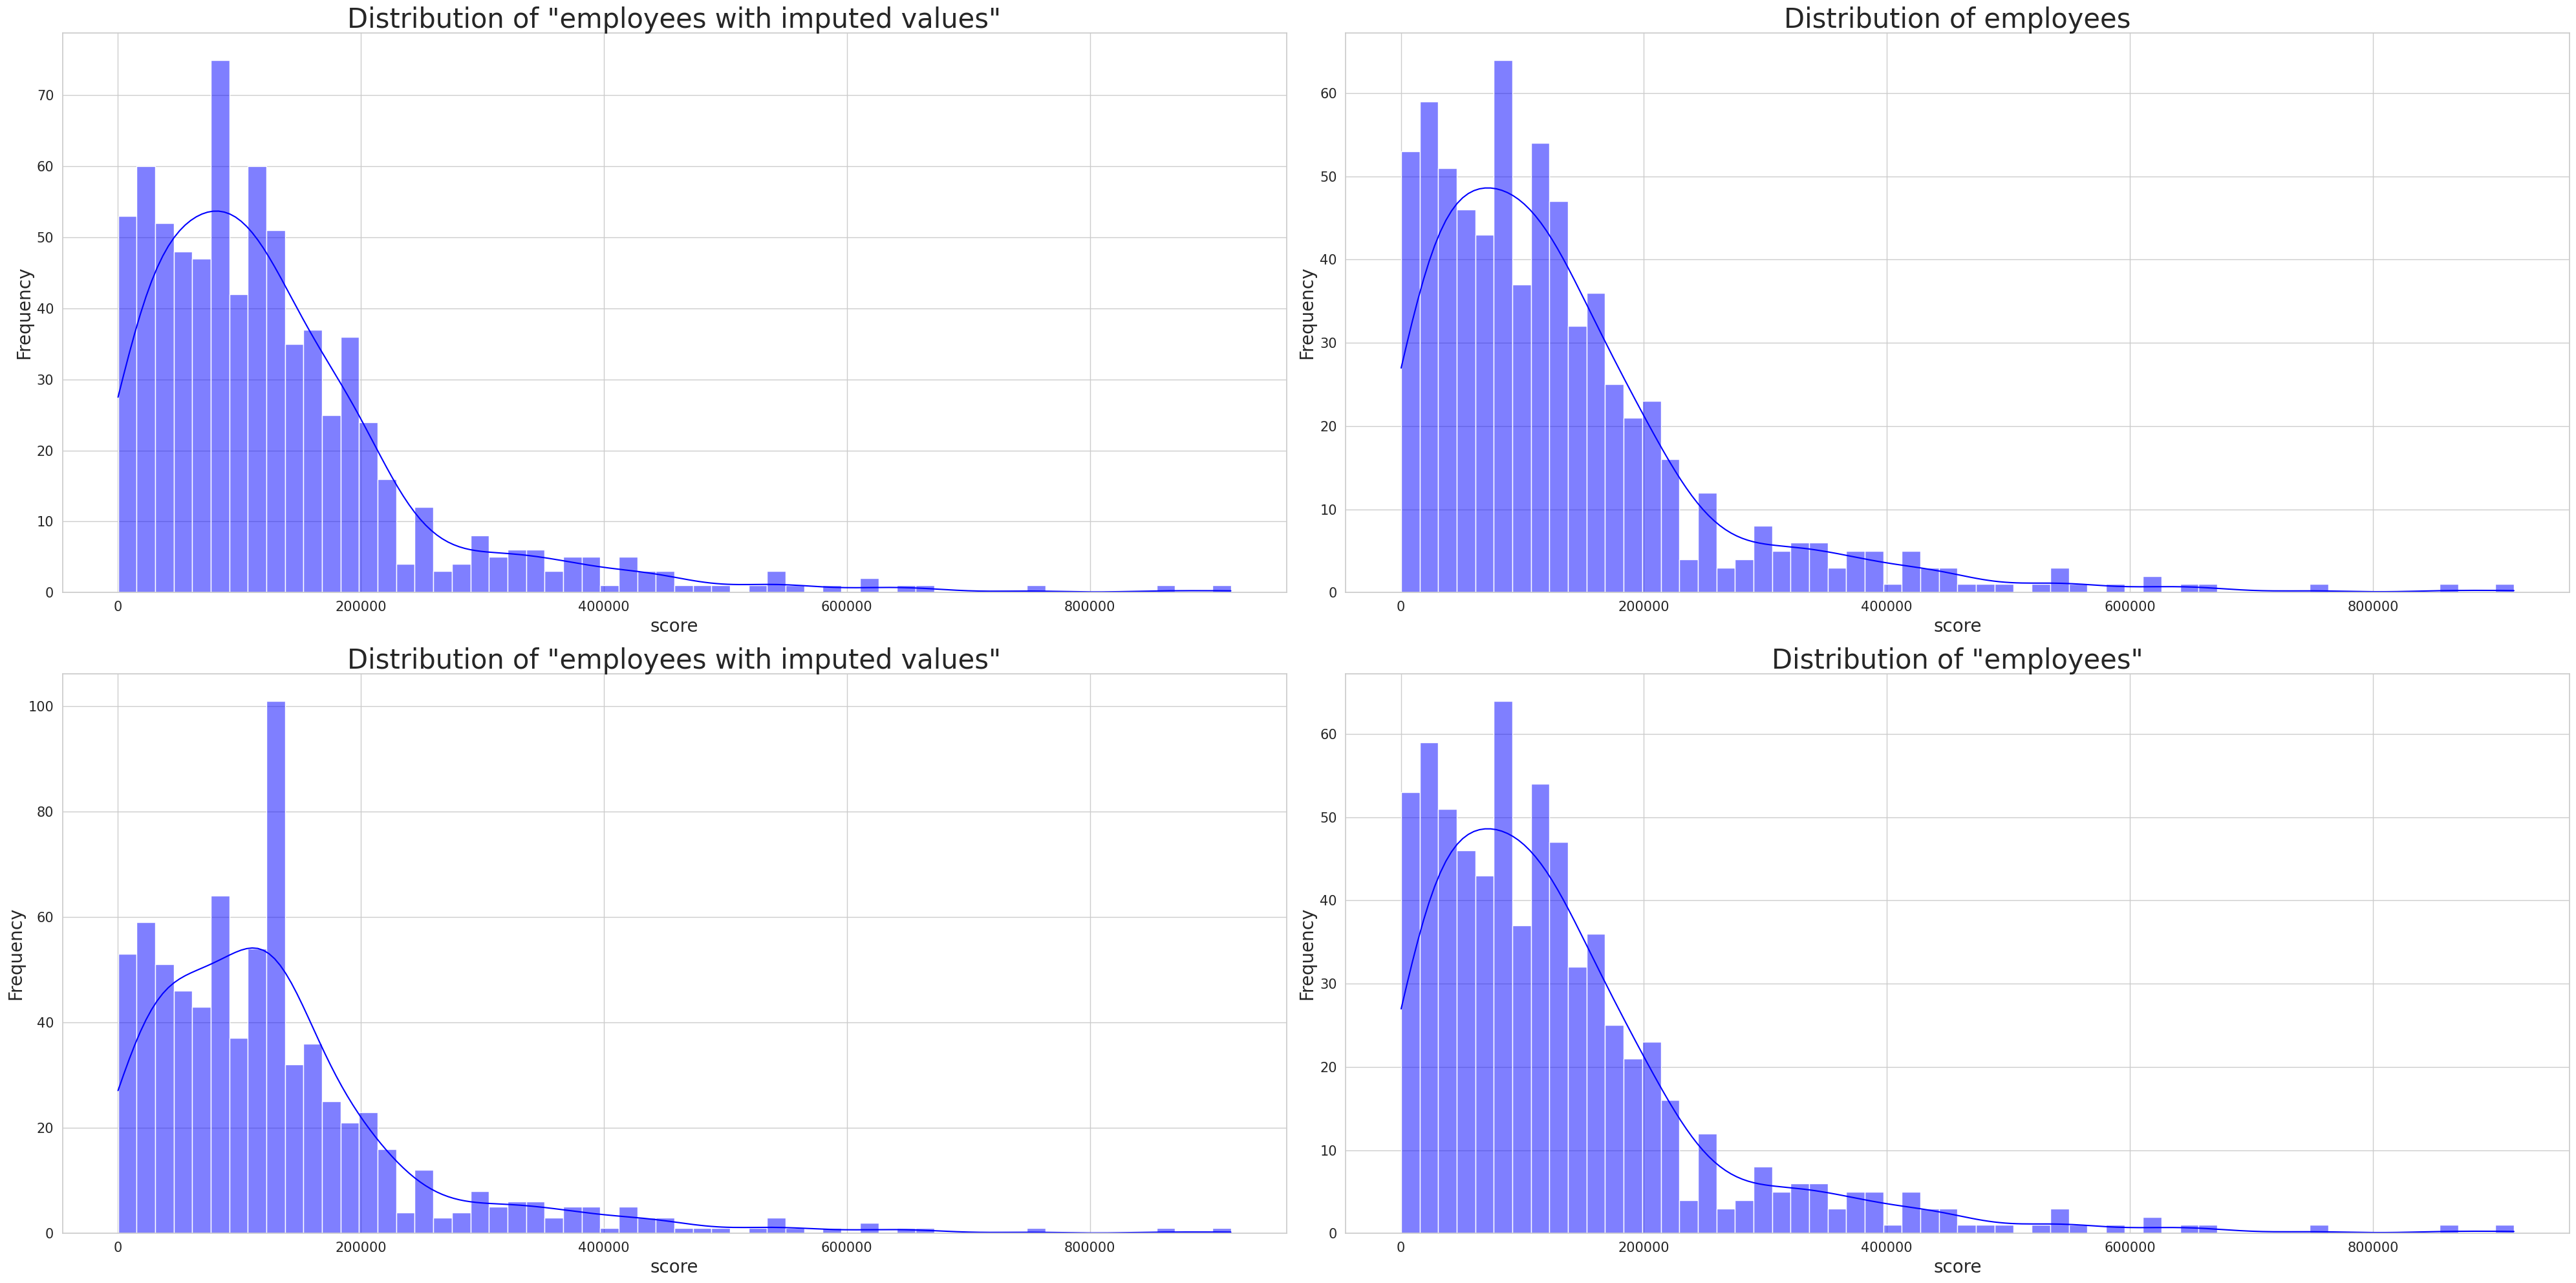

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(40, 20))

# First row
plt.subplot(2, 2, 1)
sns.histplot(df_imputed["employees"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "employees with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 2, 2)
sns.histplot(one_hot_df["employees"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of employees', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#second row

plt.subplot(2, 2, 3)
sns.histplot(df_simple_imputed["employees"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "employees with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2, 2, 4)
sns.histplot(one_hot_df["employees"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "employees"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.tight_layout()
plt.show()

These images show the distributions after the imputations, on the first row with the IterativeImputer, in the second row with the SimpleImputer. For this dataset, the IterativeImputer seems to perform better, the predicted values are less extreme and the existing distribution is better aproximated.

In [30]:
#df_imputed.to_csv("data_2_imputed.csv")